In [85]:
#Brad Olinger
#Quant Bio
#Week 2
#Step 8: Exploratory data analysis through plotting

#A)The read depth distribution of variant genotypes (histogram)

#import scikit-allel
conda install -c conda-forge scikit-allel
import allel

SyntaxError: invalid syntax (<ipython-input-85-c061b5ab9169>, line 9)

In [9]:
#Import pandas
import pandas as pd

In [92]:
#Extract DP (read depth) from vcf file Info field
callset = allel.read_vcf('prediction.vcf', fields=['variants/DP'])
callset['variants/DP']

array([119, 119, 198, ...,  66, 111,  39], dtype=int32)

In [93]:
#Construct a dataframe
df1 = pd.DataFrame(callset['variants/DP'])
print(df1)

         0
0      119
1      119
2      198
3       47
4      125
...    ...
42583  191
42584  389
42585   66
42586  111
42587   39

[42588 rows x 1 columns]


Text(0, 0.5, 'Variant')

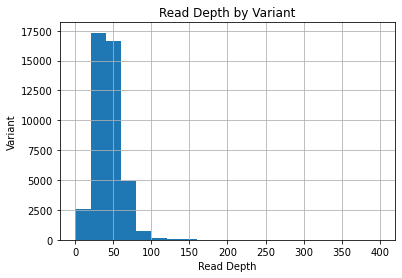

In [94]:
#A) create a histogram of the read depth for all genotypes
import pylab as pl
df1.hist(column = 0, bins=20, range=[0, 400])
pl.title("Read Depth by Variant")
pl.xlabel("Read Depth")
pl.ylabel("Variant")

Text(0, 0.5, 'Variant')

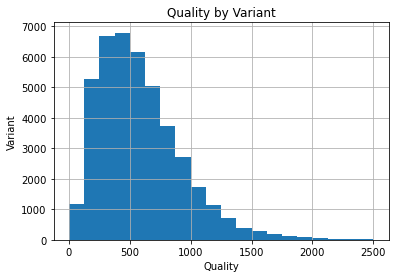

In [95]:
#Extract DP (read depth) from vcf file Info field
callset = allel.read_vcf('prediction.vcf', fields=['variants/QA'])
#Construct a dataframe
df2 = pd.DataFrame(callset['variants/QA'])
#B) create a histogram of the read depth for all genotypes
df2.hist(column = 0, bins=20, range=[0, 2500])
pl.title("Quality by Variant")
pl.xlabel("Quality")
pl.ylabel("Variant")

Text(0, 0.5, 'Variant')

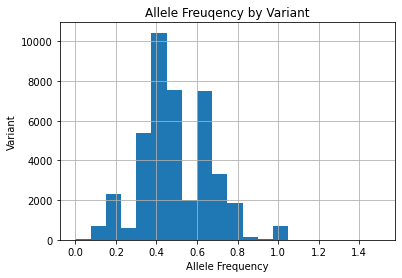

In [96]:
#Extract DP (read depth) from vcf file Info field
callset = allel.read_vcf('prediction.vcf', fields=['variants/AF'])
#Construct a dataframe
df3 = pd.DataFrame(callset['variants/AF'])
#C) create a histogram of the read depth for all genotypes
df3.hist(column = 0, bins=20, range=[0, 1.5])
pl.title("Allele Freuqency by Variant")
pl.xlabel("Allele Frequency")
pl.ylabel("Variant")

<AxesSubplot:xlabel='0'>

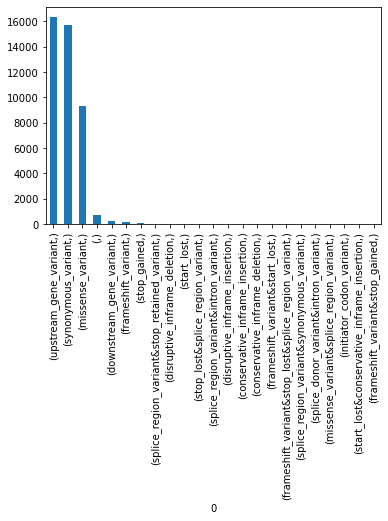

In [97]:
#Extract DP (read depth) from vcf file Info field
#callset = allel.read_vcf('prediction.vcf', fields=['Info/Ann'])
callset = allel.read_vcf('prediction.vcf', fields='ANN', numbers={'ANN': 1},
                         transformers=allel.ANNTransformer())

#Construct a dataframe
df4 = pd.DataFrame(callset['variants/ANN_Annotation'])
#A) create a histogram of the read depth for all genotypes
df4B = df4.value_counts()
df4B.plot.bar()
#pl.title("Allele Freuqency by Variant")
#pl.xlabel("Allele Frequency")
#pl.ylabel("Variant")

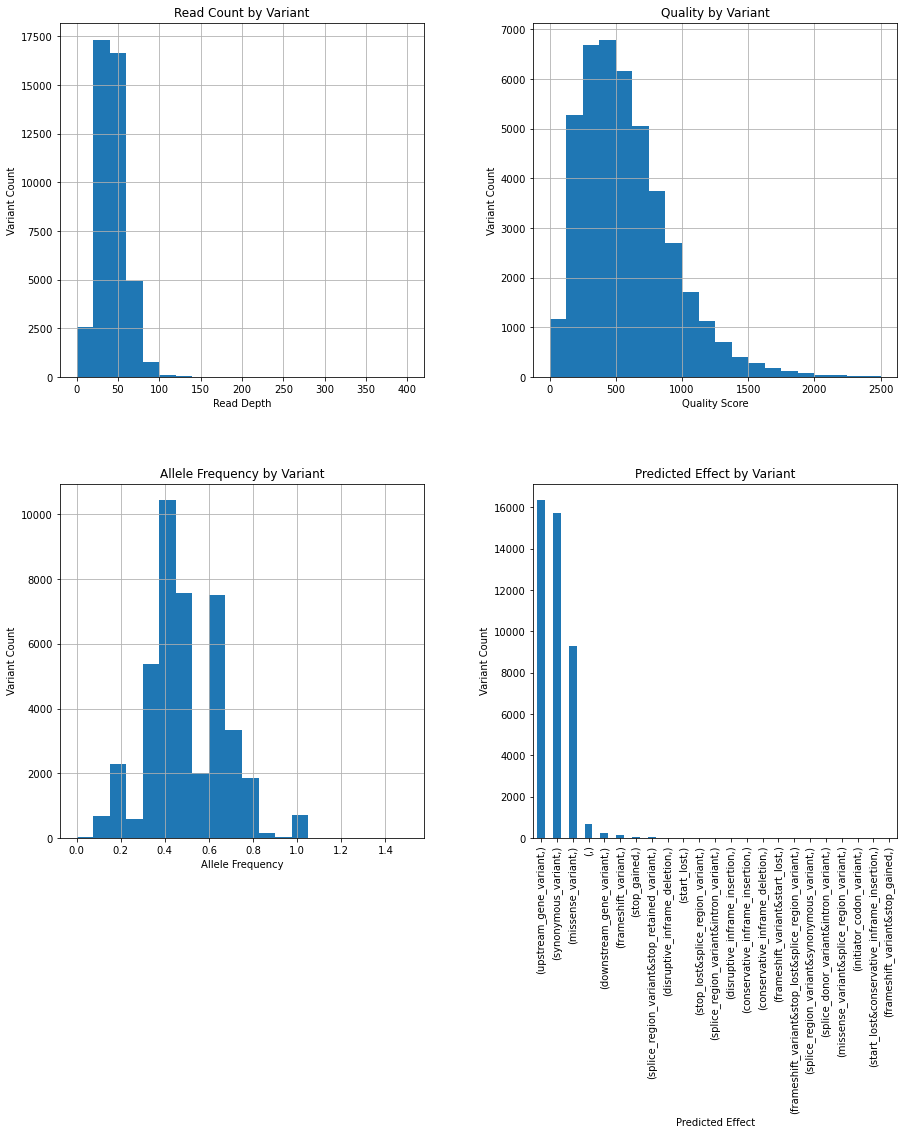

In [124]:
#Add all graphs together into one graph and relabel 

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

df1.hist(column = 0, bins=20, range=[0, 400], ax=axes[0,0])
df2.hist(column = 0, bins=20, range=[0, 2500], ax=axes[0,1])
df3.hist(column = 0, bins=20, range=[0, 1.5], ax=axes[1,0])
df4B.plot.bar(ax=axes[1,1])
axes[0,0].title.set_text('Read Count by Variant')
axes[0,0].set_xlabel('Read Depth')
axes[0,0].set_ylabel('Variant Count')
axes[0,1].title.set_text('Quality by Variant')
axes[0,1].set_xlabel('Quality Score')
axes[0,1].set_ylabel('Variant Count')
axes[1,0].title.set_text('Allele Frequency by Variant')
axes[1,0].set_xlabel('Allele Frequency')
axes[1,0].set_ylabel('Variant Count')
axes[1,1].title.set_text('Predicted Effect by Variant')
axes[1,1].set_xlabel('Predicted Effect')
axes[1,1].set_ylabel('Variant Count')
fig.set_figheight(15)
fig.set_figwidth(15)